# Exploratory Data Analysis
---
This notebook contains visualizations for the sampled dataset of 28,692 Wikipedia discussion comments, which have been scored for toxicity, aggression, and whether the comment constitutes a personal attack. A small dataset of 320 Ao3 comments is also visualized. This dataset was gathered for purpose of testing the generalizability of our abuse-detection model, which will be trained on the Wikipedia comments dataset. Data dictionaries are available in the README.

## Contents

- [**Wikipedia Comments**](#Wikipedia-Comments)
    - [Type of attack](#Type-of-attack)
    - [Toxicity](#Toxicity)
    - [Aggression](#Aggression)
    - [Year of comment](#Year-of-comment)
    - [Login status](#Login-status)
    - [Length of comment](#Length-of-comment)
    - [Comment text](#Comment-text)
<br><br>
- [**Ao3 Comments**](#Ao3-Comments)
    - [Trolls](#Trolls)
    - [Length of comment](#Length-of-comment)
    - [Login status](#Login-status)
    - [Comment text](#Comment-text)

In [1]:
# Importing libraries for visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Importing libraries for word vectorizing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
import re

In [2]:
# Reading cleaned datasets into Pandas dataframe
ao3 = pd.read_csv("../datasets/clean/ao3_clean.csv")
df = pd.read_csv("../datasets/clean/wiki_clean_sampled.csv")
df_full = pd.read_csv("../datasets/clean/wiki_clean_full.csv")

In [3]:
# Downloading stopwords and instantiating lemmatizer
nltk.download('stopwords')
nltk.download("wordnet")
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Wikipedia Comments
---
### Type of attack
Out of the original dataset, which comprised 75,649 comments, 19% were flagged by the majority of workers as a personal attack. As there were a large number of comments flagged as attacks (14,346 in total), I decided to fix the imbalanced dataset by undersampling the majority class. 

The sampled dataset comprised of 15,000 comments, of which exactly 50% was flagged as an attack. *The subsequent visualizations will be based on the sampled dataset.*

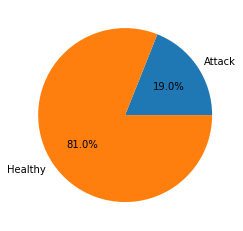

In [4]:
# Plotting pie chart of percentage comments labelled as an attack
pct_att = pd.Series({"Attack":df_full["attack"].mean(), "Healthy":1 - df_full["attack"].mean()})
plt.pie(pct_att, labels = pct_att.keys(), autopct='%1.1f%%');

# Subsetting datasets for later visualizations
df_att = df.loc[df["attack"]==1]
df_not = df.loc[df["attack"]==0]

If a worker indicated that a comment was a personal attack, they were also asked to indicate what type of attack was used in the comment. In the sampled dataset:
- 31.4% of comments were flagged as targeted towards a recipient (e.g. you suck)
- 7.9% of comments were flagged as targeted towards a third-party (e.g. Bob sucks)
- 1.3% of comments were flagged as being quoted or reported (e.g. Bob says Henri sucks)
- 7.0% of comments were flagged as containing some other type of attack or harassment

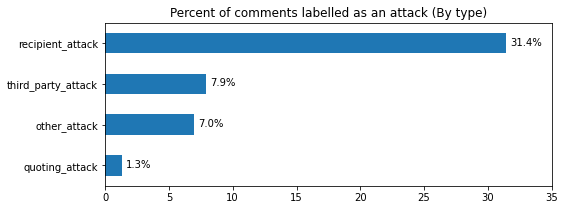

In [5]:
# Creating dictionary of means for each attack type
attack_types = {col:(df[col].mean() * 100) for col in df.columns[1:5]}

# Plotting bar chart of percent comments labelled as each attack type
plt.figure(figsize = [8,3])
plt.xlim(0, 35)
plt.title("Percent of comments labelled as an attack (By type)")
pd.Series(attack_types).sort_values().plot(kind = "barh")
for i, v in enumerate(sorted(attack_types.values())):
    plt.text(v + 0.3, i - 0.05, str(round(v,1))+"%");

### Toxicity
Comments in the dataset are rated for toxicity on a scale of 1 - 5. On average, the mean toxicity score was 3.3, with a score of 3 indicating that the comment was neither healthy nor toxic. However, the distribution of toxicity scores had two clear peaks. This is likely because the distributions for flagged comments and unflagged comments were different.

The average toxicity score was:  3.3


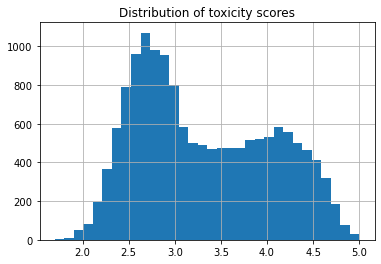

In [30]:
# Printing the mean toxicity score
print("The average toxicity score was: ", round(df["toxicity_score"].mean(),1))

# Plotting histogram of toxicity scores
df.hist("toxicity_score", bins = 32)
plt.title("Distribution of toxicity scores");

As seen from the histograms below, unflagged comments had an average toxicity score of 2.7 and was skewed towards the politer end of the scale. Comments that were flagged as attacks had an average toxicity score of 3.9 and was skewed towards the higher end of the scale.

The average toxicity score for comments flagged as attacks is:  3.9
The average toxicity score for comments not flagged is:  2.7


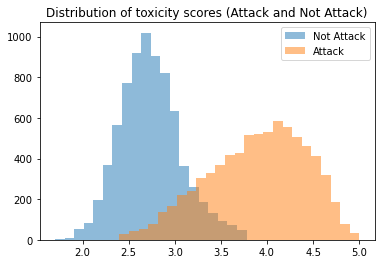

In [45]:
# Printing the mean toxicity score by flagged or unflagged
print("The average toxicity score for comments flagged as attacks is: ", round(df_att["toxicity_score"].mean(),1))
print("The average toxicity score for comments not flagged is: ", round(df_not["toxicity_score"].mean(),1))

# Plotting histograms of toxicity score by flagged or unflagged
plt.title("Distribution of toxicity scores (Attack and Not Attack)")
plt.hist(df_not["toxicity_score"], bins=20, alpha=0.5, label="Not Attack")
plt.hist(df_att["toxicity_score"], bins=25, alpha=0.5, label="Attack")
plt.legend();

### Aggression
Comments in the dataset are rated for aggression on a scale of 1 - 7. On average, the mean aggression score was 4.8, with a score of 4 indicating that the comment was neither friendly nor aggressive. However, as with toxicity, the distribution of aggression scores also appeared to have two peaks. This is because the distributions for flagged comments and unflagged comments were also different for aggression.

The average aggression score was:  4.8


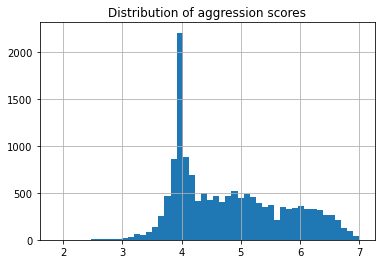

In [44]:
# Printing the mean aggression score
print("The average aggression score was: ", round(df["aggression_score"].mean(),1))

# Plotting histogram of aggression scores
df.hist("aggression_score", bins = 50)
plt.title("Distribution of aggression scores");

As seen from the histograms below, unflagged comments had an average aggression score of 4.1. Comments that were flagged as attacks had an average aggression score of 5.6. Interestingly, aggression scores were generally high even for comments not flagged as attacks. The peak of the histogram was at 4, a neutral score, and the distribution seemed skewed towards the higher end, with few comments being scored as "friendly".

The average aggression score for comments flagged as attacks is:  5.6
The average aggression score for comments not flagged is:  4.1


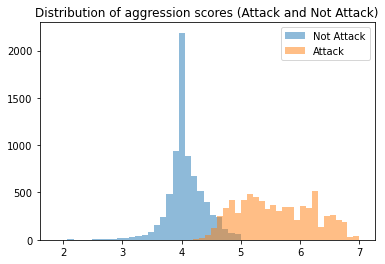

In [51]:
# Printing the mean aggression score by flagged or unflagged
print("The average aggression score for comments flagged as attacks is: ", round(df_att["aggression_score"].mean(),1))
print("The average aggression score for comments not flagged is: ", round(df_not["aggression_score"].mean(),1))

# Plotting histograms of aggression score by flagged or unflagged
plt.title("Distribution of aggression scores (Attack and Not Attack)")
plt.hist(df_not["aggression_score"], bins=30, alpha=0.5, label="Not Attack")
plt.hist(df_att["aggression_score"], bins=30, alpha=0.5, label="Attack")
plt.legend();

### Year of comment
The dataset comprised of comments made between 2003 and 2016, with most of the comments being made between 2006 to 2009. There wasn't significant differences between the years in which flagged comments were made and the years in which unflagged comments were made.

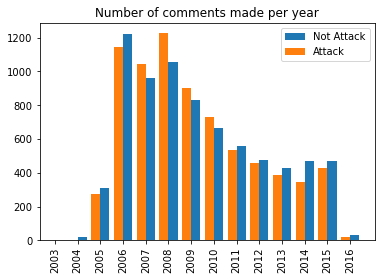

In [47]:
plt.title("Number of comments made per year")
plt.bar(np.unique(df_not["year"])+0.2, df_not.groupby("year").count()["rev_id"], width = 0.4, label = "Not Attack")
plt.bar(np.unique(df_att["year"])-0.2, df_att.groupby("year").count()["rev_id"], width = 0.4, label = "Attack")
plt.xticks(np.unique(df["year"]), rotation = 90)
plt.legend();

### Login status
On average, nearly 60% of comments in the dataset were made by users who were logged into accounts. This means that 40% of comments were made by anonymous users. While 70% of unflagged comments were made by logged in users, only 45% of flagged comments were made by logged in users. The majority of abusive discussion comments were thus made by anonymous commenters.

In [11]:
# Calculating percentage of users logged in by flagged or unflagged comment
att_login = round(df_att["logged_in"].mean() * 100, 1)
not_login = round(df_not["logged_in"].mean() * 100, 1)
all_login = round(df["logged_in"].mean() * 100, 1)

# Plotting table of percentages
pd.DataFrame({"Logged In": ["Yes", "No"], 
              "Attack": [str(att_login)+"%", str(100 - att_login)+"%"], 
              "Not Attack": [str(not_login)+"%", str(round(100 - not_login,1))+"%"], 
              "Total": [str(all_login)+"%", str(100 - all_login)+"%"]})

,Logged In,Attack,Not Attack,Total
0,Yes,46.3%,71.1%,58.7%
1,No,53.7%,28.9%,41.3%


### Length of comment
The average length of comments in the dataset was 287 characters. The distribution of comment lengths was strongly skewed towards smaller word counts, but the histogram had a long tail tapering off towards the high end, with the highest values exceeding 2500 characters.

The average comment length was:  287


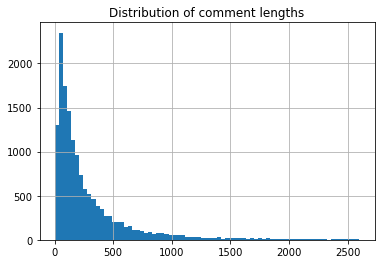

In [12]:
# Printing the mean comment length
print("The average comment length was: ", round(df["comment_len"].mean()))

# Plotting bar chart of 
df.hist("comment_len", bins = 75)
plt.title("Distribution of comment lengths");

As seen from the box plots below, comments that were flagged as attacks were on average shorter in length than unflagged comments. Abusive comments had an average length of 254 characters, while non-abusive comments had an average length of 339 characters.

It is notable that there were a large number of potential outliers highlighted by the box plot for both flagged and unflagged comments. However, as I had already removed outliers with comment lengths higher than mean + 3SD in the data cleaning notebook, I will not be removing further data points.

The average length of flagged comments is:  245
The average length of unflagged comments is:  329


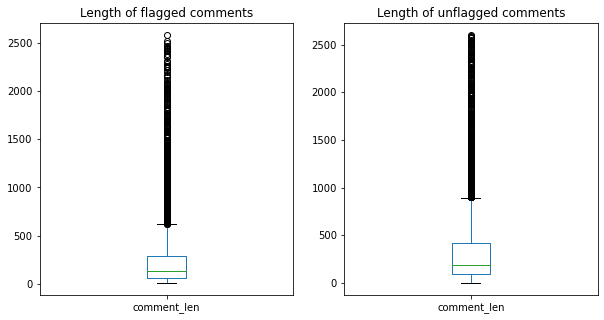

In [13]:
# Printing the mean toxicity score by flagged or unflagged
print("The average length of flagged comments is: ", round(df_att["comment_len"].mean()))
print("The average length of unflagged comments is: ", round(df_not["comment_len"].mean()))

# Plotting boxplot for comments flagged as attacks
plt.subplot(1,2,1)
plt.title("Length of flagged comments")
df_att["comment_len"].plot(kind = "box", figsize = [10,5])

# Plotting boxplot for comments not flagged as attacks
plt.subplot(1,2,2)
plt.title("Length of unflagged comments")
df_not["comment_len"].plot(kind = "box");

### Comment text
#### Pre-processing

In [14]:
# Creating a function that removes punctuation and numbers, and tokenizes and lemmatizes text
def clean_text(text):
    # Typecast text to string
    text = str(text)
    
    # Remove punctuation and make everything lowercase
    text = "".join([word.lower() for word in text if word not in string.punctuation])   
    
    # Tokenize and lemmatize words
    tokens = re.split('\W+', text)
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [15]:
# Instantiating tf-idf vectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)

# Vectorizing comments flagged as attacks
att_tfidf = tfidf_vect.fit_transform(df_att["comment"])
att_tfidf_df = pd.DataFrame(att_tfidf.toarray())
att_tfidf_df.columns = tfidf_vect.get_feature_names()

# Vectorizing comments not flagged as attacks
not_tfidf = tfidf_vect.fit_transform(df_not["comment"])
not_tfidf_df = pd.DataFrame(not_tfidf.toarray())
not_tfidf_df.columns = tfidf_vect.get_feature_names()

#### Top words
Words classified as attacks were generally high in profanity compared to those not classified as attacks. In comparison, the tone of unflagged comments seemed politer with words like "please" and "thanks", and also more objective or academic with words like "source".

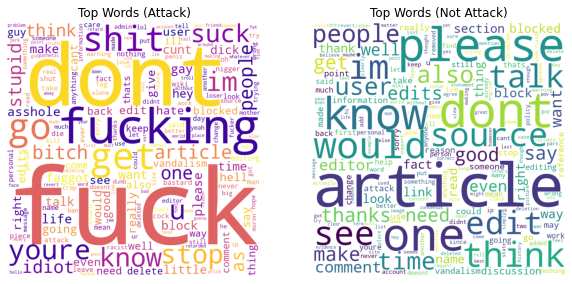

In [16]:
# Removing common words from visualization
del_words = ["wikipedia", "like", "page"]
att_tfidf_del = att_tfidf_df.drop(columns = del_words)
not_tfidf_del = not_tfidf_df.drop(columns = del_words)

# Converting to dictionary as wordcloud requires frequencies to be in dictionary format
att_tfidf_del = att_tfidf_del.sum(axis = 0).to_dict()
not_tfidf_del = not_tfidf_del.sum(axis = 0).to_dict()

# Plotting wordcloud for flagged comments
wordcloud_att = WordCloud(width = 800, height = 800, background_color ='white', colormap = "plasma",
                          stopwords = stopwords, min_font_size = 10).generate_from_frequencies(att_tfidf_del)

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(wordcloud_att)
plt.axis("off")
plt.title("Top Words (Attack)");

# Plotting wordcloud for unflagged comments
wordcloud_not = WordCloud(width = 800, height = 800, background_color ='white', colormap = "viridis",
                stopwords = stopwords, min_font_size = 10).generate_from_frequencies(not_tfidf_del)

plt.subplot(1,2,2)
plt.imshow(wordcloud_not)
plt.axis("off")
plt.title("Top Words (Not Attack)");

#### Top bigrams

In [17]:
# Instantiating bigram vectorizer
bigram_vect = TfidfVectorizer(ngram_range=[2,2], min_df = 10)

# Vectorizing comments flagged as attacks
att_bigram = bigram_vect.fit_transform(df_att["comment"])
att_bigram_df = pd.DataFrame(att_bigram.toarray())
att_bigram_df.columns = bigram_vect.get_feature_names()

# Vectorizing comments not flagged as attacks
not_bigram = bigram_vect.fit_transform(df_not["comment"])
not_bigram_df = pd.DataFrame(not_bigram.toarray())
not_bigram_df.columns = bigram_vect.get_feature_names()

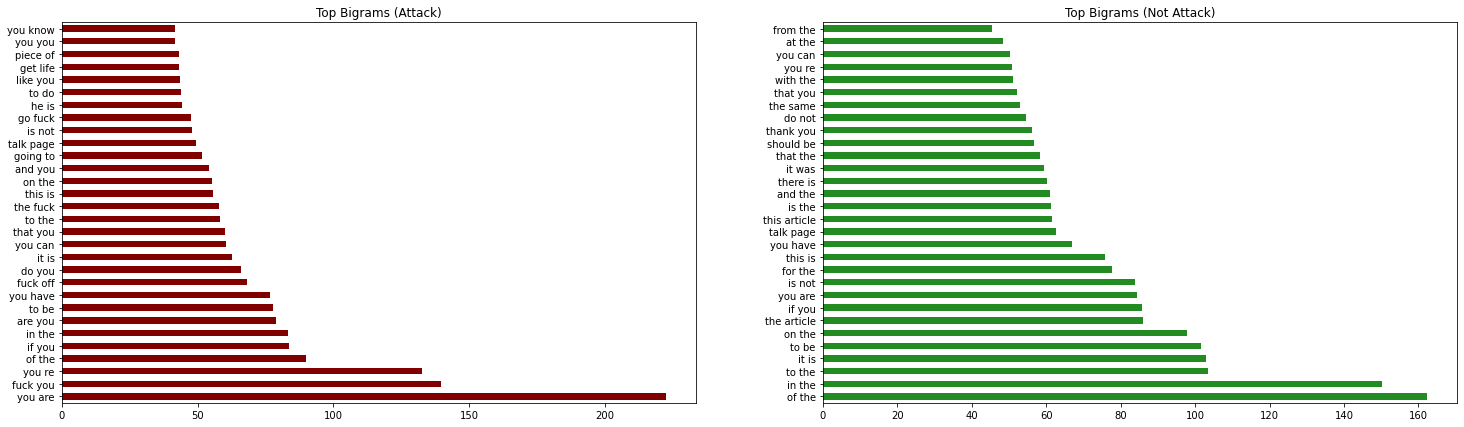

In [18]:
# Plotting top bigrams for flagged comments
plt.figure(figsize = (25,7))
plt.subplot(1,2,1)
att_bigram_df.sum().sort_values(ascending=False).head(30).plot(kind="barh", color = "maroon")
plt.title("Top Bigrams (Attack)");

# Plotting top bigrams for unflagged comments
plt.subplot(1,2,2)
not_bigram_df.sum().sort_values(ascending=False).head(30).plot(kind="barh", color = "forestgreen")
plt.title("Top Bigrams (Not Attack)");

#### Top trigrams
The aggressiveness of language used in comments flagged as attacks is more apparent when looking at top trigrams, which feature profanity like "go fuck yourself" and "piece of shit", but also features aggressive but not profane phrases like "why did you" and "how dare you". In comparison, healthy comments feature politer phrases like "thank you for" and "please do not".

In [19]:
# Instantiating trigram vectorizer
trigram_vect = TfidfVectorizer(ngram_range=[3,3], min_df = 10)

# Vectorizing comments flagged as attacks
att_trigram = trigram_vect.fit_transform(df_att["comment"])
att_trigram_df = pd.DataFrame(att_trigram.toarray())
att_trigram_df.columns = trigram_vect.get_feature_names()

# Vectorizing comments not flagged as attacks
not_trigram = trigram_vect.fit_transform(df_not["comment"])
not_trigram_df = pd.DataFrame(not_trigram.toarray())
not_trigram_df.columns = trigram_vect.get_feature_names()

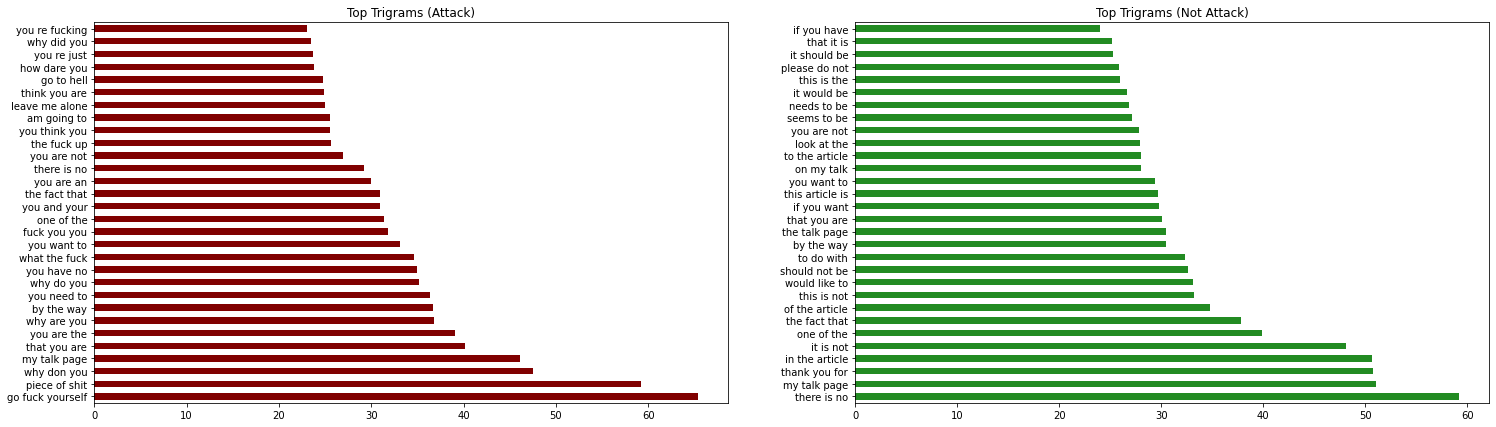

In [20]:
# Plotting top trigrams for flagged comments
plt.figure(figsize = (25,7))
plt.subplot(1,2,1)
att_trigram_df.sum().sort_values(ascending=False).head(30).plot(kind="barh", color = "maroon")
plt.title("Top Trigrams (Attack)");

# Plotting top trigrams for unflagged comments
plt.subplot(1,2,2)
not_trigram_df.sum().sort_values(ascending=False).head(30).plot(kind="barh", color = "forestgreen")
plt.title("Top Trigrams (Not Attack)");

## Ao3 Comments
---
This dataset contains 160 abusive comments and 160 positive comments posted on Ao3 works that are based on The Untamed, a popular Chinese drama. I chose to focus on works based on The Untamed because this community is plagued by a number of known trolls, which allowed me to collect a large and diversified sample of abusive comments just by looking through records on social media or datasets put together by fans in the community. Screenshots of abusive comments were also shared with me after I put a request on Twitter and in relevant Discord servers.

### Trolls
Abusive comments in the dataset came from 4 known trolls, labeled as troll1, troll2, troll3, and troll4 in the dataset. While collating these comments, I made attempts to ensure that the dataset was not dominated by one troll. From the charts below, we can see:
- There were 45 comments (28.1%) written by Troll 1
- There were 30 comments (18.8%) written by Troll 2
- There were 32 comments (20.0%) written by Troll 3
- There were 42 comments (26.2%) written by Troll 4
- The remaining 11 comments (6.9%) were written by unknown aggressors

In [21]:
# Subsetting data for visualization purposes
ao3_att = ao3[ao3["abusive"]==1]
ao3_not = ao3[ao3["abusive"]==0]

# Plot table of aggressors
pd.DataFrame({"Comments":ao3.groupby("aggressor").count()["comment"]})

,Comments
aggressor,
troll1,45
troll2,30
troll3,32
troll4,42
unknown,11


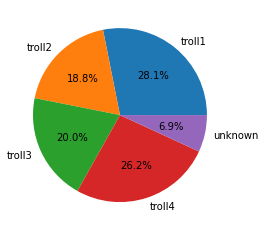

In [22]:
# Plot pie chart of aggressors
plt.pie(ao3.groupby("aggressor").count()["comment"], 
        labels = np.unique(ao3_att["aggressor"]), 
        autopct='%1.1f%%');

### Length of comment

Similarly to comment lengths in the Wikipedia dataset, comments in the Ao3 dataset are heavily skewed towards the shorter end, although a long tail extends to around 2500 characters. The mean comment length was 206, which was shorter than the mean of 287 for the Wikipedia dataset.

The average comment length was: 206


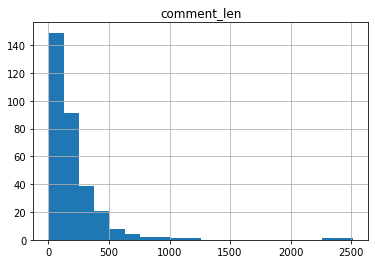

In [23]:
# Calculating average comment length
print("The average comment length was:", round(ao3["comment_len"].mean()))

# Plotting histogram of comment lengths
ao3.hist("comment_len", bins = 20);

Different trolls had different writing styles. In general, all their comments skewed towards the shorter end. However, trolls 1 and 2 had more variance, with some of their comments exceeding 1000 characters, and in troll 2's case, even exceeding 2500 characters. Troll 3 tended to leave relatively short comments.

In [65]:
print("The average comment length for troll1 was:", round(ao3[ao3["aggressor"]=="troll1"]["comment_len"].mean()))
print("The average comment length for troll2 was:", round(ao3[ao3["aggressor"]=="troll2"]["comment_len"].mean()))
print("The average comment length for troll3 was:", round(ao3[ao3["aggressor"]=="troll3"]["comment_len"].mean()))
print("The average comment length for troll4 was:", round(ao3[ao3["aggressor"]=="troll4"]["comment_len"].mean()))
print("The average comment length for unknown was:", round(ao3[ao3["aggressor"]=="unknown"]["comment_len"].mean()))

The average comment length for troll1 was: 234
The average comment length for troll2 was: 371
The average comment length for troll3 was: 130
The average comment length for troll4 was: 183
The average comment length for unknown was: 229


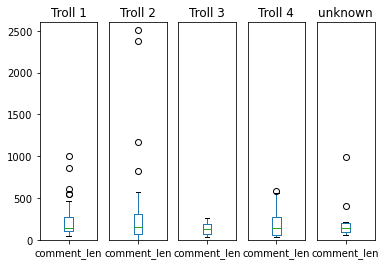

In [55]:
# Plotting boxplot for troll 1
plt.subplot(1,5,1)
plt.title("Troll 1")
plt.ylim(0,2600)
ao3[ao3["aggressor"] == "troll1"]["comment_len"].plot(kind = "box")

# Plotting boxplot for troll 2
plt.subplot(1,5,2)
plt.title("Troll 2")
plt.ylim(0,2600)
plt.yticks([])
ao3[ao3["aggressor"] == "troll2"]["comment_len"].plot(kind = "box")

# Plotting boxplot for troll 3
plt.subplot(1,5,3)
plt.title("Troll 3")
plt.ylim(0,2600)
plt.yticks([])
ao3[ao3["aggressor"] == "troll3"]["comment_len"].plot(kind = "box")

# Plotting boxplot for troll 4
plt.subplot(1,5,4)
plt.title("Troll 4")
plt.ylim(0,2600)
plt.yticks([])
ao3[ao3["aggressor"] == "troll4"]["comment_len"].plot(kind = "box")

# Plotting boxplot for unknown
plt.subplot(1,5,5)
plt.title("unknown")
plt.ylim(0,2600)
plt.yticks([])
ao3[ao3["aggressor"] == "unknown"]["comment_len"].plot(kind = "box");

On average, non-abusive comments were shorter with a mean of 186 characters compared to abusive comments with a mean of 225 characters. However, the average is heavily skewed by the several abnormally long comments posted by Troll 2. The median values were extremely close at 139 and 132 characters respectively, and a look at the box plot suggests that the distribution of comment lengths were similar for both abusive and non-abusive comments.

The average comment length for abusive comments was: 225
The average comment length for non-abusive comments was: 186
The median comment length for abusive comments was: 139
The median comment length for non-abusive comments was: 132


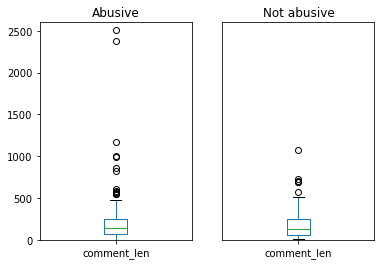

In [25]:
# Calculating means
print("The average comment length for abusive comments was:", round(ao3_att["comment_len"].mean()))
print("The average comment length for non-abusive comments was:", round(ao3_not["comment_len"].mean()))
print("The median comment length for abusive comments was:", round(ao3_att["comment_len"].median()))
print("The median comment length for non-abusive comments was:", round(ao3_not["comment_len"].median()))

# Plotting boxplot for abusive comments
plt.subplot(1,2,1)
plt.title("Abusive")
plt.ylim(0,2600)
ao3_att["comment_len"].plot(kind = "box")

# Plotting boxplot for non-abusive comments
plt.subplot(1,2,2)
plt.title("Not abusive")
plt.ylim(0,2600)
plt.yticks([])
ao3_not["comment_len"].plot(kind = "box");

### Login Status
Trolls 1 and 3 tended to be logged in when leaving comments, particularly when targeting writers who had closed anonymous commenting. Trolls 2 and 4, however, were always anonymous.

In [61]:
ao3_att.groupby("aggressor")["logged_in"].mean()

aggressor
troll1     0.688889
troll2     0.000000
troll3     0.620690
troll4     0.000000
unknown    0.181818
Name: logged_in, dtype: float64

### Comment text
#### Preprocessing

In [26]:
# Instantiating tf-idf vectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)

# Vectorizing abusive comments
ao3_att_tfidf = tfidf_vect.fit_transform(ao3_att["comment"])
ao3_att_tfidf_df = pd.DataFrame(ao3_att_tfidf.toarray())
ao3_att_tfidf_df.columns = tfidf_vect.get_feature_names()

# Vectorizing non-abusive comments
ao3_not_tfidf = tfidf_vect.fit_transform(ao3_not["comment"])
ao3_not_tfidf_df = pd.DataFrame(ao3_not_tfidf.toarray())
ao3_not_tfidf_df.columns = tfidf_vect.get_feature_names()

In [62]:
# Removing common words from visualization
# Note: most of the words being removed are character names
del_words = ["wwx", "wei", "wuxian", 
             "lwj", "lan", "wangi",
             "jc", "jiang", "cheng",
             "jgy", "jin", "guangyao", "meng", "yao",
             "lxc", "xichen",
             "wangxian", "xiyao", "sangcheng",
             "like", "story", "u"]

for word in del_words:
    if word in ao3_att_tfidf_df.columns:
        ao3_att_tfidf_df.drop(columns = word, inplace = True)
    if word in ao3_not_tfidf_df.columns:
        ao3_not_tfidf_df.drop(columns = word, inplace = True)

#### Top words
When looking at word clouds of Ao3 comments as a whole, it’s clear that the vocabulary used is different from Wikipedia comments. Abusive ao3 comments do not contain as much profanity, instead containing more fanfiction-specific attacks. This includes use of acronyms like “ooc” which stands for “out of character” which is often used as a fanfiction-specific attack on an author’s writing ability. Also unlike with Wikipedia comments, positive Ao3 comments seemed to sometimes contain profanity.

It’s thus likely that abusive comments that contain fanfiction-specific attacks may be misclassified. Positive comments that make use of profanity are also likely to be misclassified in bag of word models.

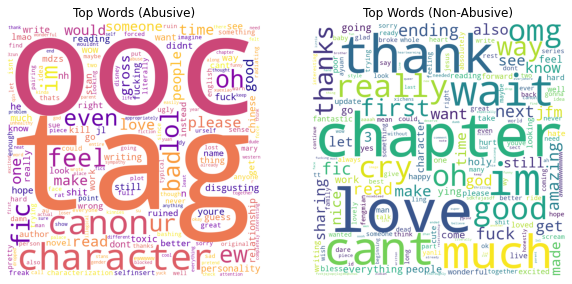

In [64]:
# Converting to dictionary as wordcloud requires frequencies to be in dictionary format
ao3_att_tfidf_del = ao3_att_tfidf_df.sum(axis = 0).to_dict()
ao3_not_tfidf_del = ao3_not_tfidf_df.sum(axis = 0).to_dict()

# Plotting wordcloud for flagged comments
ao3_wordcloud_att = WordCloud(width = 800, height = 800, background_color ='white', colormap = "plasma",
                          stopwords = stopwords, min_font_size = 10).generate_from_frequencies(ao3_att_tfidf_del)

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(ao3_wordcloud_att)
plt.axis("off")
plt.title("Top Words (Abusive)");

# Plotting wordcloud for unflagged comments
ao3_wordcloud_not = WordCloud(width = 800, height = 800, background_color ='white', colormap = "viridis",
                stopwords = stopwords, min_font_size = 10).generate_from_frequencies(ao3_not_tfidf_del)

plt.subplot(1,2,2)
plt.imshow(ao3_wordcloud_not)
plt.axis("off")
plt.title("Top Words (Non-Abusive)");

#### Summary of trolls and harassment styles

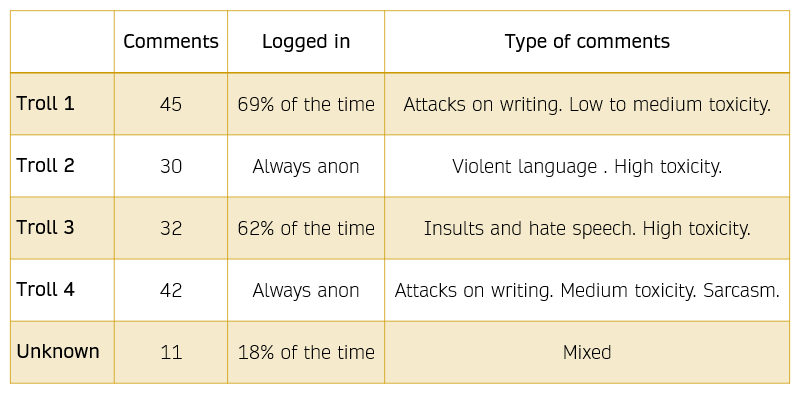

- Trolls 2 and 3 tended to leave highly toxic content that utilized violent language, insults, and hate speech. This included suicide baiting, wishing violence on authors and their families, and targeted transphobic harassment of transgender authors.
    - **Troll 2:** kill urself please
    - **Troll 2:** dear author, i hope someone precious to you dies- maybe ur parents?
    - **Troll 3:** still i just think you werent bullied enough for being half horse half rat freak bc you still seem to have the nerve to exist. how odd.
    - **Troll 3:** kinda amazing that anyone would want to display theyre a hideous middle aged tranny to everyone, but alas
<br><br>
- Troll 1 tended to make attacks on the writing itself, spamming authors with comments of varying toxicity levels in an attempt to appear like they were multiple different people. For example, the two comments given as examples here were left for the same author, on the same story. 
    - **Troll 1:** Felt rushed. But other than that, a pretty okay story :)
    - **Troll 1:** Genuinely disgusted EW what the FUCK SHSMS
<br><br>
- Similar to Troll 1, Troll 4 also tended to make attacks on the writing. But what’s notably different and interesting about this troll is that they make very heavy use of sarcasm, which NLP models often have trouble reading.
    - **Troll 4:** lol wow love how you completely gutted their personalities to write this au! great job! :D :D :D
    - **Troll 4:** Fantastic self-insert where you could shove all your favorite pairings together no matter how illogical and change the plot to suit your own fantasies :D
<br><br>
- In terms of the different kinds of trolling styles, Troll 2 and Troll 3 are probably much more likely to be caught by the abuse classifier, while Troll 1 and Troll 4 are more likely to show up as false negatives due to heavy use of fanfiction-specific attacks, lack of profanity, and in the case of Troll 4, heavy use of sarcasm.